## Loading data into Pandas

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

### Reading in files
df = pd.read_csv('./data/pokemon_data.csv')
# df_xlsx = pd.read_excel('pokemon_data.xlsx')
# df = pd.read_csv('pokemon_data.txt', delimiter='\t')

### prints top 5 columns
# print(df.head(5))

### Prints the column "HP"
df['HP']


0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

## High Level Exploration of Data in Pandas

In [31]:
#### Read Headers
df.columns

### Read specific columns by passing in a list
#print(df[['Name', 'Type 1', 'HP']])

### Read a series for rows
#print(df.iloc[0:4])

## Read specified row and column (R,C)
#print(df.iloc[2,1])

### Iterate through all rows, can drop the "Name" specification to grab all rows 
#for index, row in df.iterrows():
#    print(index, row['Name'])


### Filtering for specific values
#df.loc[df['HP'] > 200]

### Describing the distribution of quantitative data
df.describe()


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Sorting/Describing Data

In [32]:
### Used to sort values, can sort by multiple values if passed a list, can change sort by passing a bool
df.sort_values(['Type 1', 'Attack'], ascending=[True, False])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False
650,589,Escavalier,Bug,Steel,70,135,105,60,105,20,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
405,370,Luvdisc,Water,NaN,43,30,55,40,65,97,3,False
198,183,Marill,Water,Fairy,70,20,50,20,50,40,2,False
508,458,Mantyke,Water,Flying,45,20,50,60,120,50,4,False
381,349,Feebas,Water,NaN,20,15,20,10,55,80,3,False


## Making changes to the data

In [45]:
### Defining a new column, sums columns 4 through 9 (exclusive so specify to 10) and applies it to all rows 
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
### Another way to skin the cat
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

### Removing columns 
# df = df.drop(columns=['Total'])

### Reordering column headers to move total before all stats, hard coding is tricky so be careful 
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]

df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Saving our Data (Exporting into Desired Format)

In [34]:
### Saving the dataframe 
df.to_csv('./data/modified.csv', index=False)

### Saving to an excel file or specifying the delimeter
#df.to_excel('modified.xlsx', index=False)
#df.to_csv('modified.txt', index=False, sep='\t')


## Filtering Data

In [35]:
## Filtereing by multiple conditions with & and separated statements with (), created a new dataframe as well
new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]

### Resets the index fo the new dataframe
new_df.reset_index(drop=True, inplace=True)
#new_df.to_csv('filtered.csv')

### Filtering for Pokemon that contain the str Mega, use "~" at beginning to do the inverse, can also do regEx here
#df.loc[df['Name'].str.contains('Mega')]
#df.loc[~df['Name'].str.contains('Mega')]
#df.loc[df['Type 1'].str.contains('Fire|Water', regex=True)]
df.loc[df['Name'].str.contains('^pi[a-z]*', flags=re.I, regex=True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
136,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
219,204,Pineco,Bug,NaN,290,50,65,90,35,35,15,2,False
239,221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False



## Conditional Changes and Data Cleaning

In [36]:
### Changing "Fire" type to "Flame", can change which columns are changed by replacing the second 'Type 1'
df.loc[df['Type 1'] == 'Fire', 'Type 1']= 'Flame'

### Changing multiple columns at a time by passing a list
df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Test 1', 'Test 2']

### rounding the totla columns if needed
#df['Total'] = pd.Series([round(val,0) for val in df['Total']],
#                       index=df.index)

#df = pd.read_csv('modified.csv')

## Group By


In [37]:
### Averages, grouped by a specific column, can also sort by stacking the sort function
#df.groupby(['Type 1']).mean().sort_values('HP', ascending=False)


### .count() does not include Nulls or NAN's, if you want to include, can help to define a count row with a static value of 1
#df['count'] = 1

### Can aggregate by multiple values by using the .agg function and passing a list of NamedAgg items, which will rename the columns
# Or you can pass a dict to specify what the aggregation is 

df.groupby(['Type 1', 'Type 2']).agg(
            mean_HP=pd.NamedAgg(column='HP', aggfunc='mean'),
            mean_total=pd.NamedAgg(column='Total', aggfunc='mean')
    ).sort_values(['Type 1','mean_total'], ascending=[True, False])


mean_HP  mean_total
Type 1 Type 2                          
Bug    Fighting   80.000000  550.000000
       Steel      67.714286  509.714286
       Fire       70.000000  455.000000
       Rock       46.666667  435.000000
       Flying     63.000000  419.500000
...                     ...         ...
Water  Ghost      77.500000  407.500000
       Flying     63.142857  404.000000
       Electric  100.000000  395.000000
       Grass      60.000000  346.666667
       Fairy      85.000000  335.000000

[136 rows x 2 columns]

In [38]:
# However in some instances it's useful to aggregate by more interesting functions beyond mean, max, min, count, and sum.
# In this case you can use functions from user defined funtions or other libraries, however you lose the capacity to rename them, at least in one line
# Note that if you need to pass multiple arguements or need to add additional logic, it's easiest to just define a new function

def perc_75(series):
    return(np.percentile(series, 75))

df.groupby(['Type 1', 'Type 2']).agg(
    {
        'HP':['sum',np.median],
        'Total':['count', perc_75]
    }
).sort_values('Type 1', ascending=True)

HP        Total        
                 sum median count perc_75
Type 1 Type 2                            
Bug    Electric  120   60.0     2  433.75
       Fighting  160   80.0     2  575.00
       Fire      140   70.0     2  502.50
       Flying    882   65.0    14  469.50
       Ghost       1    1.0     1  236.00
...              ...    ...   ...     ...
Water  Electric  200  100.0     2  427.50
       Dragon    165   82.5     2  645.00
       Rock      283   64.5     4  487.50
       Flying    442   62.0     7  469.00
       Steel      84   84.0     1  530.00

[136 rows x 4 columns]

## Pivot Tables

In [39]:
# Useful when you want to break out a row in to columns and then aggregate items
type_mx=df.pivot_table(index='Type 1', columns='Type 2', values='Total', aggfunc='mean')
type_mx=type_mx.fillna(0)
type_mx

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.000000,0.0,395.5,0.000000,550.000000,455.000000,419.500000,236.00,384.000000,345.000000,0.000000,0.0,347.916667,0.000000,435.00,509.714286,269.000000
Dark,0.0,0.000000,440.0,0.0,0.000000,418.000000,476.666667,494.000000,430.00,0.000000,0.000000,470.000000,0.0,0.000000,385.000000,0.00,415.000000,0.000000
Dragon,0.0,0.000000,0.0,680.0,590.000000,0.000000,680.000000,641.666667,0.00,0.000000,522.000000,686.666667,0.0,0.000000,650.000000,0.00,0.000000,0.000000
Electric,0.0,0.000000,610.0,0.0,431.000000,0.000000,520.000000,537.600000,440.00,520.000000,0.000000,520.000000,385.0,0.000000,0.000000,0.00,441.666667,520.000000
Fairy,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,475.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000
Fighting,0.0,495.000000,0.0,0.0,0.000000,0.000000,0.000000,500.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,400.000000,0.00,575.000000,0.000000
Flame,0.0,0.000000,634.0,0.0,0.000000,492.857143,0.000000,551.500000,0.00,0.000000,441.666667,0.000000,438.0,0.000000,537.000000,410.00,600.000000,600.000000
Flying,0.0,0.000000,390.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000
Ghost,0.0,485.000000,680.0,0.0,0.000000,0.000000,388.333333,423.000000,0.00,409.900000,0.000000,0.000000,0.0,453.750000,0.000000,0.00,0.000000,0.000000


In [46]:
# Can also pass additionally defined functions, or you can use lambda in this instance in the aggfunc arg
#type_mx=df.pivot_table(index='Type 1', columns='Type 2', values='Total', aggfunc=perc_75)
#type_mx=type_mx.fillna(0)
#type_mx

type_mx=df.pivot_table(index='Type 1', columns='Type 2', values='Total', aggfunc=lambda x: np.median(x))
type_mx=type_mx.fillna(0)
type_mx

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,395.5,0.0,550.0,455.0,412.5,236.0,392.5,345.0,0.0,0.0,372.5,0.0,475.0,495.0,269.0
Dark,0.0,0.0,420.0,0.0,0.0,418.0,500.0,505.0,430.0,0.0,0.0,470.0,0.0,0.0,385.0,0.0,415.0,0.0
Dragon,0.0,0.0,0.0,680.0,590.0,0.0,680.0,640.0,0.0,0.0,600.0,700.0,0.0,0.0,650.0,0.0,0.0,0.0
Electric,0.0,0.0,610.0,0.0,431.0,0.0,520.0,580.0,440.0,520.0,0.0,520.0,385.0,0.0,0.0,0.0,465.0,520.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,495.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,575.0,0.0
Fire,0.0,0.0,634.0,0.0,0.0,528.0,0.0,557.0,0.0,0.0,460.0,0.0,438.0,0.0,537.0,410.0,600.0,600.0
Flying,0.0,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,0.0,485.0,680.0,0.0,0.0,0.0,370.0,423.0,0.0,404.5,0.0,0.0,0.0,452.5,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

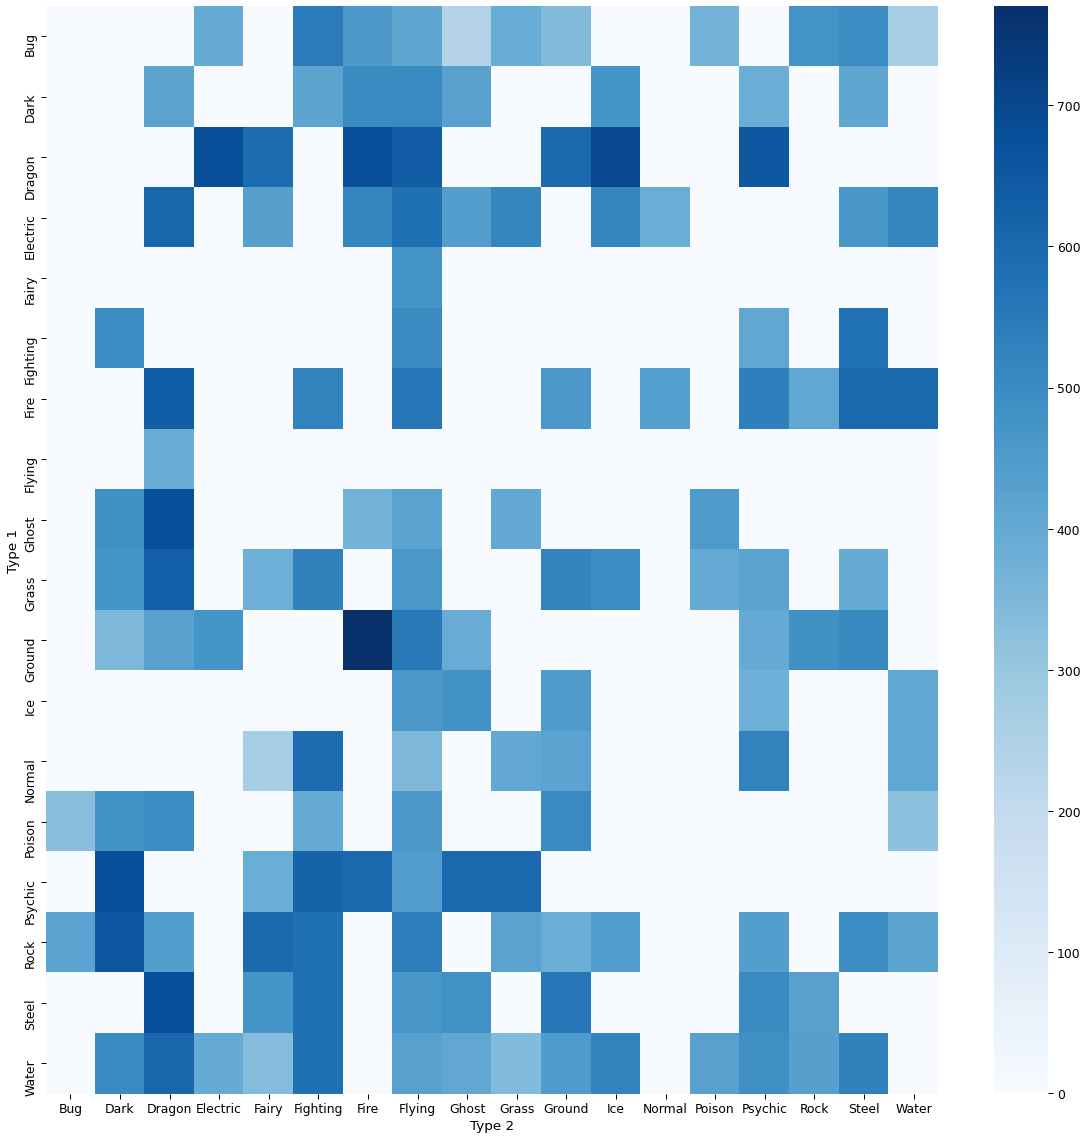

In [50]:
# pivot tables are incredibly useful for creating heatmaps. Just for fun, I'll add one below. For more on plotting with Seaborn, see seaborn_walkthrough
plt.figure(figsize=(20,20))
sns.set_context('paper',font_scale=1.4)

#heat map
sns.heatmap(type_mx,annot=False,  cmap='Blues')

## Working with large amounts of data

In [42]:
### For large datasets, it can be useful to pass in a chunksize, pandas will then batch all operations

### Create a temp dataframe to house everything
new_df = pd.DataFrame(columns=df.columns)

### Then chunk the raw dataframe, apply manipulations, and then append the compressed data
for df in pd.read_csv('./data/pokemon_data.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    new_df = pd.concat([new_df, results])
    # break is just to reduce the number of rows, don't actually put in code

new_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Fire,1,1,NaN,0,NaN,1,1,1,1,1,1,1,1
Grass,4,4,NaN,4,NaN,4,4,4,4,4,4,4,4
Fire,4,4,NaN,3,NaN,4,4,4,4,4,4,4,4
Water,1,1,NaN,0,NaN,1,1,1,1,1,1,1,1
Bug,2,2,NaN,0,NaN,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy,1,1,NaN,0,NaN,1,1,1,1,1,1,1,1
Flying,2,2,NaN,2,NaN,2,2,2,2,2,2,2,2
Fire,1,1,NaN,1,NaN,1,1,1,1,1,1,1,1
Psychic,2,2,NaN,2,NaN,2,2,2,2,2,2,2,2
